In [6]:
### Needed for this implementation

#Install opencv
!pip3 install opencv-python tqdm matplotlib numpy ipywidgets
!jupyter nbextension enable --py widgetsnbextension
import cv2 as cv

#Needed for some application and output
import math
import numpy as np
import matplotlib.pyplot as plt 

#Install match template function 
!pip3 install Multi-Template-Matching
import MTM
from MTM import matchTemplates, drawBoxesOnRGB

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [46]:
### Image processing filter

img = cv2.imread('images/terrain45.jpg', cv2.IMREAD_GRAYSCALE) 
filtered_img = cv2.bilateralFilter(img,15, 75, 75)

# Converting image to a binary image (black and white only image). 

_,threshold = cv2.threshold(filtered_img, 195, 255,cv2.THRESH_BINARY) 

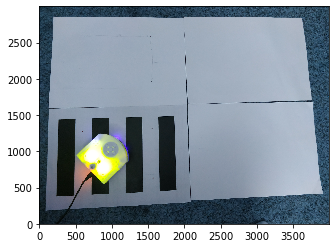

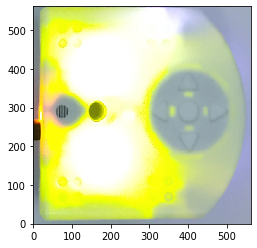

In [88]:
### Import the needed templates for the matching


# Import template of the tymio(start) and the destination 
template_1 = cv2.imread('images/thymio.jpg')[::-1,:,:]
# template_1 = template_1[100:600,30:520]

# # Import template of the destination
# template_2 =  ### à faire (ROND !!!)
# template_2 = template_2[???,???] ### à faire

#Import the image of the track
image = cv2.imread('images/terrain45.jpg')[::-1,:,:]
plt.imshow(image, origin='lower')
plt.figure()
plt.imshow(template_1, origin='lower')

In [103]:
image

array([[[ 12,  21,  24],
        [ 15,  24,  27],
        [ 16,  26,  26],
        ...,
        [ 64,  95, 118],
        [ 50,  91, 124],
        [ 48,  93, 131]],

       [[ 15,  24,  27],
        [ 18,  27,  30],
        [ 18,  28,  28],
        ...,
        [ 58,  90, 113],
        [ 50,  91, 123],
        [ 49,  94, 131]],

       [[ 16,  25,  28],
        [ 21,  30,  33],
        [ 26,  35,  38],
        ...,
        [ 51,  83, 106],
        [ 43,  85, 114],
        [ 43,  90, 122]],

       ...,

       [[ 25,  49,  61],
        [ 23,  47,  59],
        [ 24,  50,  62],
        ...,
        [ 39,  61,  79],
        [ 48,  70,  88],
        [ 48,  72,  90]],

       [[ 22,  48,  60],
        [ 24,  50,  62],
        [ 24,  50,  62],
        ...,
        [ 44,  64,  82],
        [ 43,  65,  83],
        [ 40,  62,  80]],

       [[ 24,  50,  62],
        [ 23,  49,  61],
        [ 23,  49,  61],
        ...,
        [ 42,  62,  80],
        [ 42,  62,  80],
        [ 40,  62,  80]]

In [100]:
### Find the thymio
from scipy import ndimage, misc

best_angle = 0
best = 0
best_Hit = []
for angle in np.arange(0, 359, 360/16):
    rotated = ndimage.rotate(template_1, angle) 
    name = "".join(["thymio_", str(angle)])
    listTemplate = [(name, rotated)]
    Hit = matchTemplates(listTemplate,image,method=cv2.TM_CCOEFF_NORMED, N_object=1,score_threshold=0.1, maxOverlap=0,searchBox=None)
    if Hit.Score.to_numpy()[0] > best:
        best_Hit = Hit
        best_angle = angle
        best = Hit.Score.to_numpy()[0]

theta = radians(best_angle)
print(theta)

0.0
22.5
45.0
67.5
90.0
112.5
135.0
157.5
180.0
202.5
225.0
247.5
270.0
292.5
315.0
337.5
5.497787143782138


315.0


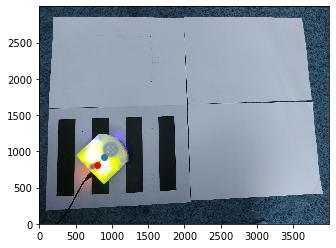

In [102]:
from math import cos, sin, radians, degrees
plt.imshow(image, origin='lower')
corner = best_Hit.BBox.to_numpy()[0][0:2]
size = best_Hit.BBox.to_numpy()[0][2:4]
center = np.array(corner) + np.array(size)/2
plt.scatter(center[0], center[1])

forward = np.array([-cos(theta), sin(theta)])
wheel_center = center + forward*150
plt.scatter(wheel_center[0], wheel_center[1], c='r')

print(degrees(theta))

In [171]:
### Find the destination

listTemplate = [("destination",template_2)]
Hit_2 = matchTemplates(listTemplate,image,method=cv2.TM_CCOEFF_NORMED, N_object=1,score_threshold=0.9, maxOverlap=0,searchBox=None)


# Show the results
Overlay_2 = drawBoxesOnRGB(image, best_Hit, showLabel=True)  
coordinates = Hits.BBox.to_numpy()
end_point = (coordinates[0]+1/2*coordinates[2],coordinates[1]+1/2*coordinates[3])

(1561, 1669, 490, 500)

In [ ]:
plt.imshow(Overlay_2)